In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier

In [3]:
wine_df = pd.read_csv("wine.csv")
wine_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
wine_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
wine_df['type'].unique()

array(['white', 'red'], dtype=object)

In [7]:
#dropping
print("before dropping",wine_df.shape)
wine_df.dropna(axis=0, inplace=True)

before dropping (6497, 13)


In [8]:
features = wine_df.columns
features = features.drop(['type','quality'])
# features = features.drop('type')

features

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [10]:
X = wine_df[wine_df.columns.drop('quality')]

In [11]:
#type attribute label encoding
label_encoder = LabelEncoder()
X['type'] = label_encoder.fit_transform(X['type'])
X

C:\Users\Acer\AppData\Local\Temp\ipykernel_22296\2210494823.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['type'] = label_encoder.fit_transform(X['type'])


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [12]:
y = wine_df['quality']
y

0       6
1       6
2       6
3       6
4       6
       ..
6491    6
6492    5
6494    6
6495    5
6496    6
Name: quality, Length: 6463, dtype: int64

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3686,1,7.6,0.30,0.37,1.60,0.087,27.0,177.0,0.99438,3.09,0.50,9.8
4434,1,7.2,0.24,0.24,1.70,0.045,18.0,161.0,0.99196,3.25,0.53,11.2
5866,0,9.0,0.40,0.43,2.40,0.068,29.0,46.0,0.99430,3.20,0.60,12.2
3483,1,6.1,0.36,0.26,8.15,0.035,14.0,88.0,0.99031,3.06,0.27,13.0
183,1,6.9,0.27,0.40,14.00,0.050,64.0,227.0,0.99790,3.18,0.58,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...
4959,0,7.7,0.69,0.49,1.80,0.115,20.0,112.0,0.99680,3.21,0.71,9.3
3290,1,7.8,0.25,0.37,1.00,0.043,10.0,80.0,0.99128,3.08,0.38,11.4
1677,1,7.3,0.23,0.37,1.80,0.032,60.0,156.0,0.99200,3.11,0.35,11.1
2631,1,6.7,0.28,0.28,2.40,0.012,36.0,100.0,0.99064,3.26,0.39,11.7


In [16]:
#normalization
scaler = Normalizer().fit(X_train)
normalized_x_train = scaler.transform(X_train)
normalized_x_test = scaler.transform(X_test)

In [17]:
y_train.unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [18]:
K=3
knn = KNeighborsClassifier(K)
knn.fit(normalized_x_train,y_train)
y_pred = knn.predict(normalized_x_test)
print(y_pred)
# print(y_test)

[5 7 6 ... 6 6 5]


In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.4988399071925754

In [20]:
for K in range(1,10):
  knn = KNeighborsClassifier(K)
  knn.fit(normalized_x_train,y_train)
  y_pred = knn.predict(normalized_x_test)
  score = accuracy_score(y_test,y_pred)
  print(f'the accuracy for K:{K} => {score}')

the accuracy for K:1 => 0.5784996133023975
the accuracy for K:2 => 0.5073472544470224
the accuracy for K:3 => 0.4988399071925754
the accuracy for K:4 => 0.4980665119876257
the accuracy for K:5 => 0.5011600928074246
the accuracy for K:6 => 0.49497293116782676
the accuracy for K:7 => 0.4918793503480278
the accuracy for K:8 => 0.48646558391337974
the accuracy for K:9 => 0.4934261407579273


In [21]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(normalized_x_test)
cm = confusion_matrix(y_test, y_pred)
cm


array([[  0,   0,   3,   4,   0,   0],
       [  0,   1,  22,  14,   2,   0],
       [  0,   4, 228, 163,  20,   1],
       [  0,   1, 173, 348,  65,   1],
       [  0,   2,  49, 104,  60,   1],
       [  0,   0,   4,  14,   8,   1]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

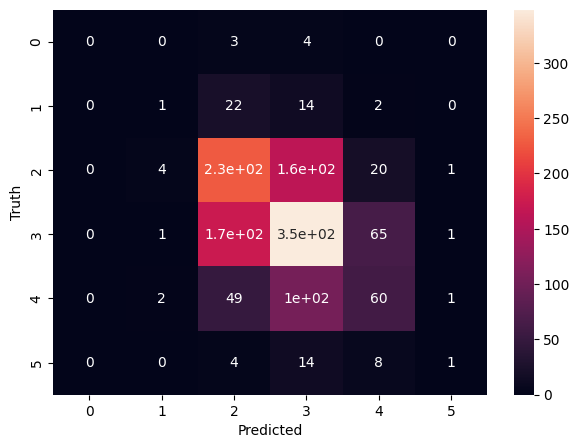

In [22]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
